# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>

1.   App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).(Web scraped data of 10k Play Store apps for analysing the Android market.)

2.   App and review data was scraped from the Google Play Store by GAUTHAM PRAKASH AND 1 COLLABORATOR in 2021. Original files listed [here](
https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps).(Google Play Store App data of 2.3 Million+ applications.)


# Import Statements

In [ ]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps_2018 = pd.read_csv('/content/apps_2018.csv')
df_apps_2021 = pd.read_csv('/content/apps_2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_apps_2018.shape

(10841, 12)

In [ ]:
df_apps_2021.shape

(71106, 15)

In [ ]:
df_apps_2018.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
90,Ay Vamos - PJ. Balvin - Piano,GAME,NaN,0,29.00,5,Free,0,Everyone,Arcade,"July 9, 2018",4.1 and up
5564,"cm, mm to inch, feet converter tool",PRODUCTIVITY,4.30,176,2.30,"100,000",Free,0,Everyone,Productivity,"September 27, 2016",2.3.3 and up
4632,Inputting Plus: Ctrl + Z/F/C/V,PRODUCTIVITY,4.20,1117,3.00,"50,000",Free,0,Everyone,Productivity,"October 18, 2017",5.0 and up
9198,Marble Woka Woka 2018 - Bubble Shooter Match 3,GAME,4.60,155186,36.00,"10,000,000",Free,0,Everyone,Puzzle,"August 3, 2018",4.1 and up
764,K-App Mitarbeiter Galeria Kaufhof,PRODUCTIVITY,NaN,0,19.00,100,Free,0,Everyone,Productivity,"July 10, 2018",4.4 and up


In [ ]:
df_apps_2021.sample(5)

,Unnamed: 0,App Name,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Last Updated,Content Rating,Scraped Time
60161,60161,Splashdown Quaywest,Food & Drink,0.00,0.00,50+,True,0.00,USD,33M,5.1 and up,Lemur Waterparks Ltd,"Sep 18, 2020",Everyone,2021-06-15 21:19:17
28356,28356,Amulyam,Shopping,4.40,7.00,500+,True,0.00,USD,12M,4.4 and up,iSolution,"Jul 24, 2020",Everyone,2021-06-15 20:47:35
24638,24638,행동유형 테스트(DISC검사),Lifestyle,4.20,146.00,"100,000+",True,0.00,USD,12M,4.0 and up,장범석,"Oct 31, 2019",Everyone,2021-06-15 20:43:38
33850,33850,Metro Theme - Free Smart Launcher Theme,Personalization,4.20,25.00,"1,000+",True,0.00,USD,5.0M,3.0 and up,Mehiru,"Sep 12, 2020",Everyone,2021-06-15 20:53:14
56728,56728,Xurshid Rasulov Barcha Qo'shiqlar,Music & Audio,4.40,205.00,"50,000+",True,0.00,USD,87M,4.2 and up,Sinova Group Mix,"Aug 19, 2020",Teen,2021-06-15 21:15:56


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [ ]:
df_apps_2018.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps_2018.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


In [ ]:
df_apps_2021.drop(['Unnamed: 0','Currency', 'Minimum Android','Developer Id','Last Updated','Scraped Time'], axis=1, inplace=True)
df_apps_2021.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Size,Content Rating
0,Gakondo,Adventure,0.00,0.00,10+,True,0.00,10M,Everyone
1,Ampere Battery Info,Tools,4.40,64.00,"5,000+",True,0.00,2.9M,Everyone
2,Vibook,Productivity,0.00,0.00,50+,True,0.00,3.7M,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00,5.00,10+,True,0.00,1.8M,Everyone
4,GROW.me,Tools,0.00,0.00,100+,True,0.00,6.2M,Everyone


In [ ]:
df_apps_2021.rename(columns = {'App Name':'App', 'Rating Count':'Reviews','Content Rating':'Content_Rating'}, inplace = True)
df_apps_2021.head()

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
0,Gakondo,Adventure,0.00,0.00,10+,True,0.00,10M,Everyone
1,Ampere Battery Info,Tools,4.40,64.00,"5,000+",True,0.00,2.9M,Everyone
2,Vibook,Productivity,0.00,0.00,50+,True,0.00,3.7M,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00,5.00,10+,True,0.00,1.8M,Everyone
4,GROW.me,Tools,0.00,0.00,100+,True,0.00,6.2M,Everyone


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_2018_clean` that does not include these rows. 

In [ ]:
nan_rows=df_apps_2018[df_apps_2018.Rating.isna()]
nan_rows.shape

(1474, 10)

In [ ]:
df_apps_2018_clean=df_apps_2018.dropna()
df_apps_2018_clean.shape

(9367, 10)

In [ ]:
nan_rows=df_apps_2021[df_apps_2021.Rating.isna()]
nan_rows.shape

(674, 9)

In [ ]:
df_apps_2021_clean=df_apps_2021.dropna()
df_apps_2021_clean.shape

(70431, 9)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_2018_clean`. 


In [ ]:
duplicated_rows_2018 = df_apps_2018_clean[df_apps_2018_clean.duplicated()]
print(duplicated_rows_2018.shape)
duplicated_rows_2018.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [ ]:
duplicated_rows_2021 = df_apps_2021_clean[df_apps_2021_clean.duplicated()]
print(duplicated_rows_2021.shape)
duplicated_rows_2021.head()

(0, 9)


,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating


In [ ]:
df_apps_2018_clean[df_apps_2018_clean.App== 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
df_apps_2018_clean = df_apps_2018_clean.drop_duplicates(subset=['App','Type','Price'])

In [ ]:
df_apps_2018_clean[df_apps_2018_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
df_apps_2018_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [ ]:
df_apps_2018_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


In [ ]:
df_apps_2021_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
65718,40 Hadis Gerakan Shalat Secara Sains,Education,5.00,5.00,500+,True,0.00,2.7M,Everyone
44582,crossfit - advanced weightlifting school training,Sports,5.00,48.00,500+,True,0.00,7.6M,Everyone
12842,Fellowship Church | Ed Young,Lifestyle,5.00,72.00,"5,000+",True,0.00,52M,Everyone
25825,Super Mama Lebanon,Social,5.00,8.00,"1,000+",True,0.00,27M,Teen
44596,S.A.M - Skabo App Music,Music & Audio,5.00,526.00,"1,000+",True,0.00,6.9M,Everyone


Only apps with very few reviews (and a low number on installs) have perfect 5 star ratings (most likely by friends and family).

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [ ]:
df_apps_2018_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


Here we can clearly see in ***2018 Data*** that there seems to be an upper bound of 100 MB for the size of an app. A quick google search would also have revealed that this limit is imposed by the Google Play Store itself. It’s interesting to see that a number of apps actually hit that limit exactly.

In [ ]:
df_apps_2021_clean.sort_values('Size', ascending=False).head()

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
48118,Animal Kingdom : Africa (Quiz/Trivia),Educational,0.00,0.00,50+,True,0.00,Varies with device,Everyone
56130,Communica24,Communication,0.00,0.00,1+,True,0.00,Varies with device,Everyone
52322,KWIPPED Supplier,Business,0.00,0.00,50+,True,0.00,Varies with device,Everyone
39879,PHOENIX magazine,Lifestyle,4.30,13.00,"1,000+",True,0.00,Varies with device,Everyone 10+
48740,नमाज़ का तरीक़ा (हिंदी में नमाज़),Education,4.70,"5,006.00","1,000,000+",True,0.00,Varies with device,Everyone


Here we clearly see in ***2021 Data*** that in Size column having "Varies with device" the reason explain in below:-
<img src='http://2.bp.blogspot.com/-yzooubTTsrc/UgvoMioEjhI/AAAAAAABLpI/xWaXnO0GisY/s640/google-play-varies-with-device.png'>

If your app needs more than 100MB of memory, you can use expansion files to store additional APK assets. You can store two expansion files per app. Each expansion file can be up to 2GB in size.

Google Play allows you to publish different APKs for your application. Each one targeted to different device configuration. Thus, each APK is an independent version of your application, but they share the same application listing on Google Play and must share the same package name and be signed with the same release key.

Usually Android applications run on most compatible devices with a single APK, by supplying alternative resources for different configurations (e.g., different layouts for different screen sizes) and the Android system selects the appropriate resources for the device at runtime. But in a few cases, however, a single APK is unable to support all device configurations, because alternative resources make the APK file too big (greater than 50MB) or other technical challenges prevent a single APK from working on all devices.

And even though Google doesn't encourage developers to use this "multiple APK" feature, most Google apps use it: Google+, Google Chrome, Gmail, Google Maps, Google Search, Google Play Books, Google Play Movies & TV, Google Translate.

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [ ]:
df_apps_2018_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [ ]:
df_apps_2021_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
58082,PUBG MOBILE - Traverse,Action,4.30,"37,479,011.00","500,000,000+",True,0.00,Varies with device,Teen
65037,TikTok,Social,4.40,"36,446,381.00","1,000,000,000+",True,0.00,89M,Teen
42228,Shadow Fight 2,Action,4.60,"14,291,156.00","100,000,000+",True,0.00,142M,Everyone 10+
36959,Netflix,Entertainment,4.40,"11,694,633.00","1,000,000,000+",True,0.00,Varies with device,Teen
25777,Criminal Case,Adventure,4.50,"4,275,556.00","100,000,000+",True,0.00,Varies with device,Teen


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
ratings_2018 = df_apps_2018_clean.Content_Rating.value_counts()
ratings_2018

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [ ]:
fig = px.pie(labels=ratings_2018.index,
values=ratings_2018.values,
title="Content Rating 2018",
names=ratings_2018.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

In [ ]:
ratings_2021 = df_apps_2021_clean.Content_Rating.value_counts()
ratings_2021

Everyone           61633
Teen                5930
Mature 17+          1848
Everyone 10+        1012
Unrated                6
Adults only 18+        2
Name: Content_Rating, dtype: int64

In [ ]:
fig = px.pie(labels=ratings_2021.index,
values=ratings_2021.values,
title="Content Rating 2021",
names=ratings_2021.index,
hole=0.6,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

To create a donut 🍩 chart, we can simply add a value for the hole argument:

In [ ]:
fig = px.pie(labels=ratings_2018.index,
values=ratings_2018.values,
title="Content Rating 2018",
names=ratings_2018.index,
hole=0.6,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

In [ ]:
fig = px.pie(labels=ratings_2021.index,
values=ratings_2021.values,
title="Content Rating 2021",
names=ratings_2021.index,
hole=0.6,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [ ]:
df_apps_2018_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [ ]:
df_apps_2018_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [ ]:
df_apps_2018_clean[['App','Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [ ]:
df_apps_2018_clean.Installs = df_apps_2018_clean.Installs.astype(str).str.replace(',', "")
df_apps_2018_clean.Installs = pd.to_numeric(df_apps_2018_clean.Installs)
df_apps_2018_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


In [ ]:
df_apps_2021_clean.Installs.describe()

count     70431
unique       20
top        100+
freq      13552
Name: Installs, dtype: object

In [ ]:
df_apps_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70431 entries, 0 to 71104
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             70431 non-null  object 
 1   Category        70431 non-null  object 
 2   Rating          70431 non-null  float64
 3   Reviews         70431 non-null  float64
 4   Installs        70431 non-null  object 
 5   Free            70431 non-null  object 
 6   Price           70431 non-null  float64
 7   Size            70431 non-null  object 
 8   Content_Rating  70431 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.4+ MB


In [ ]:
df_apps_2021_clean[['App','Installs']].groupby('Installs').count()

,App
Installs,
0+,348
1+,1947
"1,000+",12137
"1,000,000+",1003
"1,000,000,000+",4
10+,9080
"10,000+",7954
"10,000,000+",193
100+,13552


In [ ]:
df_apps_2021_clean.Installs = df_apps_2021_clean.Installs.astype(str).str.replace(',', "")
df_apps_2021_clean.Installs = df_apps_2021_clean.Installs.astype(str).str.replace('+', "")
df_apps_2021_clean.Installs = pd.to_numeric(df_apps_2021_clean.Installs)
df_apps_2021_clean[['App', 'Installs']].groupby('Installs').count()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App
Installs,
0,348
1,1947
5,2190
10,9080
50,5135
100,13552
500,5755
1000,12137
5000,4476


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [ ]:
df_apps_2018_clean.Price = df_apps_2018_clean.Price.astype(str).str.replace('$', "")
df_apps_2018_clean.Price = pd.to_numeric(df_apps_2018_clean.Price)
 
df_apps_2018_clean.sort_values('Price', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


In [ ]:
df_apps_2021_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
20127,TEST EGY,Tools,0.00,0.00,0,False,399.99,16M,Everyone
63733,1800secs,Health & Fitness,0.00,0.00,5,False,209.99,4.0M,Everyone
33661,رياضيات حادي عشر,Education,0.00,0.00,0,False,159.99,70M,Everyone
12079,Clinical Biochemistry: Metabolic & Clin Asp 3,Medical,0.00,0.00,1,False,119.99,16M,Everyone
46180,VIP Crypto Signals (cryptobotauto.com),Finance,0.00,0.00,50,False,99.99,4.8M,Teen
1401,Sub Rosa Pro,Productivity,2.00,69.00,1000,False,99.99,98M,Everyone
71038,"Swanson's Family Medicine Review, 7th Edition",Medical,0.00,0.00,10,False,89.99,12M,Everyone
51862,Sayonara,Tools,0.00,0.00,0,False,79.99,1.6M,Everyone
6086,"CURRENT D & T Emerg Med, 7 Ed",Medical,4.80,6.00,50,False,72.95,15M,Everyone
12901,"Cardiothoracic Surgery, Second Edition",Medical,0.00,0.00,5,False,65.99,9.2M,Everyone


### The most expensive apps sub $250

In [ ]:
df_apps_2018_clean = df_apps_2018_clean[df_apps_2018_clean['Price'] < 250]
df_apps_2018_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


In [ ]:
df_apps_2021_clean = df_apps_2021_clean[df_apps_2021_clean['Price'] < 250]
df_apps_2021_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating
63733,1800secs,Health & Fitness,0.00,0.00,5,False,209.99,4.0M,Everyone
33661,رياضيات حادي عشر,Education,0.00,0.00,0,False,159.99,70M,Everyone
12079,Clinical Biochemistry: Metabolic & Clin Asp 3,Medical,0.00,0.00,1,False,119.99,16M,Everyone
1401,Sub Rosa Pro,Productivity,2.00,69.00,1000,False,99.99,98M,Everyone
46180,VIP Crypto Signals (cryptobotauto.com),Finance,0.00,0.00,50,False,99.99,4.8M,Teen


### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
df_apps_2018_clean['Revenue_Estimate'] = df_apps_2018_clean.Installs.mul(df_apps_2018_clean.Price)
df_apps_2018_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


We can work out the highest grossing paid apps now. All we need to do is multiply the values in the price and the installs column to get the number:


This generously assumes of course that all the installs would have been made at the listed price, which is unlikely, as there are always promotions and free give-aways on the App Stores.

<img src='https://img-b.udemycdn.com/redactor/raw/2020-10-11_12-31-03-0188ddd4b7556c427f69ca58b970ced5.png'>

The top spot of the highest-grossing paid app goes to … Minecraft at close to $70 million. It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category. If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. The Google Play Store seems to be quite flexible with its category labels.
<img src='https://img-b.udemycdn.com/redactor/raw/2020-10-11_12-43-12-4ad2dad147ff2056c53957aadd7fc38f.png'>


In [ ]:
df_apps_2021_clean['Revenue_Estimate'] = df_apps_2021_clean.Installs.mul(df_apps_2021_clean.Price)
df_apps_2021_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Installs,Free,Price,Size,Content_Rating,Revenue_Estimate
6302,True Skate,Sports,4.40,"191,460.00",5000000,False,1.99,99M,Everyone,"9,950,000.00"
19550,The Hunt for the Lost Treasure,Adventure,4.40,"35,304.00",1000000,False,3.99,8.3M,Everyone,"3,990,000.00"
61418,Smart Tools,Tools,4.70,"66,265.00",1000000,False,3.50,11M,Everyone,"3,500,000.00"
55286,Moon+ Reader Pro,Books & Reference,4.50,"100,054.00",500000,False,6.99,Varies with device,Everyone,"3,495,000.00"
17452,Draw Something,Word,4.00,"83,929.00",1000000,False,2.99,Varies with device,Everyone,"2,990,000.00"
1815,Survivalcraft,Action,4.30,"64,696.00",500000,False,3.99,19M,Everyone 10+,"1,995,000.00"
2804,ezPDF Reader PDF Annotate Form,Productivity,3.30,"25,677.00",500000,False,3.99,33M,Everyone,"1,995,000.00"
55083,BackCountry Navigator TOPO GPS PRO,Maps & Navigation,4.20,"6,722.00",100000,False,14.99,21M,Everyone,"1,499,000.00"
59480,Riptide GP2,Racing,4.60,"37,589.00",500000,False,2.99,45M,Everyone,"1,495,000.00"
7765,FINAL FANTASY DIMENSIONS,Role Playing,4.30,"8,817.00",100000,False,13.99,1.1M,Everyone,"1,399,000.00"


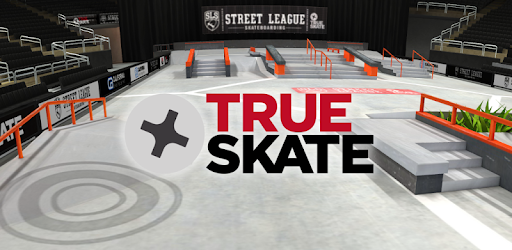

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [ ]:
df_apps_2018_clean.Category.nunique()

33

In [ ]:
top10_categor_2018 = df_apps_2018_clean.Category.value_counts()[:10]
top10_categor_2018

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [ ]:
df_apps_2021_clean.Category.nunique()

48

In [ ]:
top10_categor_2021 = df_apps_2021_clean.Category.value_counts()[:10]
top10_categor_2021

Education            7245
Music & Audio        4922
Tools                4439
Business             4397
Entertainment        4063
Lifestyle            3576
Books & Reference    3568
Personalization      2777
Health & Fitness     2556
Productivity         2393
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [ ]:
bar = px.bar(x = top10_categor_2018.index, # index = category name
             y = top10_categor_2018.values)
 
bar.show()

In [ ]:
bar = px.bar(x = top10_categor_2021.index, # index = category name
             y = top10_categor_2021.values)
 
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [ ]:
category_installs_2018 = df_apps_2018_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs_2018.sort_values('Installs', ascending=True, inplace=True)

In [ ]:
h_bar = px.bar(x = category_installs_2018.Installs,
               y = category_installs_2018.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

In [ ]:
category_installs_2021 = df_apps_2021_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs_2021.sort_values('Installs', ascending=True, inplace=True)

In [ ]:
h_bar = px.bar(x = category_installs_2021.Installs,
               y = category_installs_2021.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [ ]:
cat_number_2018 = df_apps_2018_clean.groupby('Category').agg({'App': pd.Series.count})

In [ ]:
cat_merged_df_2018 = pd.merge(cat_number_2018, category_installs_2018, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df_2018.shape}')
cat_merged_df_2018.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [ ]:
scatter = px.scatter(cat_merged_df_2018, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df_2018.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

In [ ]:
cat_number_2021 = df_apps_2021_clean.groupby('Category').agg({'App': pd.Series.count})

In [ ]:
cat_merged_df_2021 = pd.merge(cat_number_2021, category_installs_2021, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df_2021.shape}')
cat_merged_df_2021.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (48, 2)


,App,Installs
Category,,
Productivity,2393,1667417395
Entertainment,4063,1290563092
Photography,1079,1241566357
Social,1399,1071526419
Action,826,927184870
Tools,4439,646080179
Simulation,724,506451524
Casual,1501,407140251
Personalization,2777,368214910


In [ ]:
scatter = px.scatter(cat_merged_df_2021, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df_2021.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [ ]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_2018_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [ ]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
df_apps_2018_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [ ]:
df_free_vs_paid_2018 = df_apps_2018_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid_2018.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [ ]:
df_apps_2021_clean.Free.value_counts()

True     69008
False     1422
Name: Free, dtype: int64

In [ ]:
df_free_vs_paid_2021 = df_apps_2021_clean.groupby(["Category", "Free"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid_2021.head()

,Category,Free,App
0,Action,False,22
1,Action,True,804
2,Adventure,False,25
3,Adventure,True,685
4,Arcade,False,21


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [ ]:
g_bar_2018 = px.bar(df_free_vs_paid_2018,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar_2018.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar_2018.show()

In [ ]:
g_bar_2021 = px.bar(df_free_vs_paid_2021,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Free',
               barmode='group')
 
g_bar_2021.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar_2021.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [ ]:
box_2018 = px.box(df_apps_2018_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box_2018.update_layout(yaxis=dict(type='log'))
 
box_2018.show()

In [ ]:
box_2021 = px.box(df_apps_2021_clean,
             y='Installs',
             x='Free',
             color='Free',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box_2021.update_layout(yaxis=dict(type='log'))
 
box_2021.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [ ]:
df_paid_apps_2018 = df_apps_2018_clean[df_apps_2018_clean['Type'] == 'Paid']
box_2018 = px.box(df_paid_apps_2018, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box_2018.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box_2018.show()

In [ ]:
df_paid_apps_2021 = df_apps_2021_clean[df_apps_2021_clean['Free'] == False]
box_2021 = px.box(df_paid_apps_2021, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box_2021.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box_2021.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [ ]:
box_2018 = px.box(df_paid_apps_2018,
             x='Category',
             y="Price",
             title='Price per Category')
 
box_2018.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box_2018.show()

In [ ]:
box_2021= px.box(df_paid_apps_2021,
             x='Category',
             y="Price",
             title='Price per Category')
 
box_2021.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box_2021.show()
